# 机器学习作业二
- 姓名：边笛
- 学号：2012668
- 专业：计算机科学与技术

### 实验要求

1. 基本要求：将数据集winequality-white.csv按照4:1划分为训练集和测试集。

   - 构造线性回归模型，并采用批量梯度下降和随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
   - 对于批量梯度下降和随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

   特别需要注意：
   - 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
   - 需要对数据集进行一定的预处理
2. 中级要求：探究回归模型在机器学习和统计学上的差异。
   - 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。 
3. 高级要求：
   编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

**截止日期：10月21日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
import matplotlib.ticker as mtick

### 导入数据集 winequality-white

In [2]:
#读入数据
data = pd.read_csv("winequality-white.csv")

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
#打乱数据顺序，在划分数据集时达到随机效果
data = data.reindex(np.random.permutation(data.index))

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3268,7.5,0.33,0.36,2.6,0.051,26.0,126.0,0.99097,3.32,0.53,12.70,6
3040,6.3,0.20,0.37,11.8,0.045,58.0,130.0,0.99519,3.20,0.35,10.80,5
55,6.9,0.25,0.35,1.3,0.039,29.0,191.0,0.99080,3.13,0.52,11.00,6
4318,6.3,0.41,0.22,7.3,0.035,23.0,117.0,0.99172,3.20,0.39,11.94,7
4867,5.3,0.60,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2973,6.6,0.23,0.30,14.9,0.051,33.0,118.0,0.99835,3.04,0.54,9.00,6
1958,7.4,0.32,0.55,16.6,0.056,53.0,238.0,1.00170,2.96,0.58,8.70,6
1186,7.5,0.32,0.37,1.2,0.048,22.0,184.0,0.99380,3.09,0.43,9.30,5
1831,7.4,0.49,0.24,15.1,0.030,34.0,153.0,0.99530,3.13,0.51,12.00,7


### 对数据集进行预处理
常用的预处理方法有：标准化、归一化和中心化。同学们根据需要从中选择一种或几种方法进行预处理（采用其他方法亦可）。

In [4]:
# 中心化代码
def Mean_normalization(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 归一化代码
def Rescaling(x):
    x = (x - np.min(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 标准化代码
def Standardization(x):
    x=(x-np.mean(x,0))/np.std(x,axis=0)
    return x

       
# 提取特征和标签
X = data.iloc[:, 0:-1]  
X = Mean_normalization(X) #只需对X作处理
Y = data.iloc[:, -1]

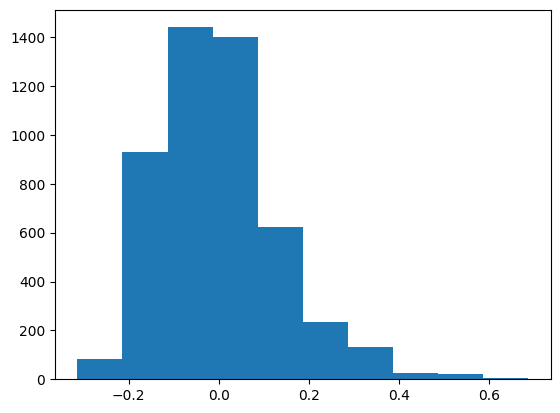

In [5]:
# 可视化中心化后的sulphates特征
plt.hist(X['sulphates'])
plt.show()

In [6]:
#由于未对数据集进行划分，划分时采取分层划分需要用到标签，所以将预处理后的数据与标签再拼到一起

data0 = pd.concat([Y,X], axis=1) #将Y放在前面是为了保持乱序，在后面添加全1列的时候可以添加在右边与X在一起，且并不影响标签顺序

data0

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3268,6,0.062040,0.050744,0.015547,-0.058151,0.015512,-0.032432,-0.028679,-0.058943,0.119758,0.046690,0.352538
3040,5,-0.053345,-0.076707,0.021571,0.082954,-0.002292,0.079066,-0.019398,0.022414,0.010667,-0.162613,0.046086
55,6,0.004347,-0.027687,0.009523,-0.078089,-0.020096,-0.021979,0.122133,-0.062220,-0.052970,0.035062,0.078344
4318,7,-0.053345,0.129175,-0.068790,0.013935,-0.031965,-0.042885,-0.049561,-0.044484,0.010667,-0.116101,0.229957
4867,6,-0.149499,0.315450,0.003499,-0.076555,-0.043835,-0.112572,-0.181811,-0.105791,0.074303,-0.127729,0.400925
...,...,...,...,...,...,...,...,...,...,...,...,...
2973,6,-0.024499,-0.047295,-0.020597,0.130500,0.015512,-0.008042,-0.047241,0.083336,-0.134788,0.058318,-0.244237
1958,6,0.052424,0.040940,0.130005,0.156573,0.030349,0.061644,0.231182,0.147920,-0.207515,0.104829,-0.292624
1186,5,0.062040,0.040940,0.021571,-0.079623,0.006610,-0.046370,0.105892,-0.004384,-0.089333,-0.069589,-0.195850
1831,7,0.052424,0.207607,-0.056742,0.133567,-0.046802,-0.004558,0.033966,0.024535,-0.052970,0.023434,0.239634


In [7]:
#回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X右侧添加全为1的一列
data1 = pd.concat([data0,pd.DataFrame(np.ones(data0.shape[0]), columns=['x0']) ], axis=1)

data1

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,x0
3268,6,0.062040,0.050744,0.015547,-0.058151,0.015512,-0.032432,-0.028679,-0.058943,0.119758,0.046690,0.352538,1.0
3040,5,-0.053345,-0.076707,0.021571,0.082954,-0.002292,0.079066,-0.019398,0.022414,0.010667,-0.162613,0.046086,1.0
55,6,0.004347,-0.027687,0.009523,-0.078089,-0.020096,-0.021979,0.122133,-0.062220,-0.052970,0.035062,0.078344,1.0
4318,7,-0.053345,0.129175,-0.068790,0.013935,-0.031965,-0.042885,-0.049561,-0.044484,0.010667,-0.116101,0.229957,1.0
4867,6,-0.149499,0.315450,0.003499,-0.076555,-0.043835,-0.112572,-0.181811,-0.105791,0.074303,-0.127729,0.400925,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,6,-0.024499,-0.047295,-0.020597,0.130500,0.015512,-0.008042,-0.047241,0.083336,-0.134788,0.058318,-0.244237,1.0
1958,6,0.052424,0.040940,0.130005,0.156573,0.030349,0.061644,0.231182,0.147920,-0.207515,0.104829,-0.292624,1.0
1186,5,0.062040,0.040940,0.021571,-0.079623,0.006610,-0.046370,0.105892,-0.004384,-0.089333,-0.069589,-0.195850,1.0
1831,7,0.052424,0.207607,-0.056742,0.133567,-0.046802,-0.004558,0.033966,0.024535,-0.052970,0.023434,0.239634,1.0


In [8]:
#首先判断一共有几种数据标签

DATA=np.array(data1)
Col=len(DATA[0]) #数据列数
Row=len(DATA)    #行数
Quality=[]       #储存数据标签类型
for j in range(Row):
    i=DATA[j][0]
    if i not in Quality:
        Quality.append(i)

#classify列表的一项用来存储数据标签相同的一类
classify=[]
for i in range(len(Quality)):  
    classify.append([])
    
cn=len(classify) #数据类型数

for i in range(Row):
    k=DATA[i]
    for j in range(len(Quality)):   #具体每一项存储的是什么类型对应着Quality
        if k[0]==Quality[j]:
            classify[j].append(k)
for i in range(len(Quality)):
    classify[i]=np.array(classify[i])

In [9]:
#使用sklearn中train_test_split的数据划分方法（由于听说不支持sklearn，于是抛弃了这种方法）

# from sklearn.model_selection import train_test_split,cross_val_score
# data_X=classify[0][:,0:Col-1]
# data_y=classify[0][:,Col-1:Col]
# X_train, X_test, y_train, y_test = train_test_split(data_X0, data_y0, test_size=0.2)
# # print(np.shape(y_train))
# for i in range(1,cn):
#     data_X=classify[i][:,0:Col-1]
# #     print(np.shape(data_X))
#     data_y=classify[i][:,Col-1:Col]
# #     print(np.shape(data_y))
#     trainX, testX, trainy, testy = train_test_split(data_X, data_y, test_size=0.2)
#     X_train=np.vstack((X_train,trainX))
#     X_test=np.vstack((X_test,testX))
#     y_train=np.vstack((y_train,trainy))
#     y_test=np.vstack((y_test,testy))
# # print(len(X_train))
# # print(np.shape(y_train))
# # print(np.shape(X_test))
# # print(np.shape(y_test))
# train=len(X_train)
# test=len(X_test)
# X=np.vstack((X_train,X_test))
# y=np.vstack((y_train,y_test))

In [10]:
#划分数据集


'''由于不会创建空数组，于是单独在循环外面借助第一类数据创建了训练集、测试集，并拆分成X，y'''
n = int(len(classify[0][:,0])*0.8)
X_train = classify[0][0:n,1:]
X_test = classify[0][n:,1:]
y_train = classify[0][0:n,0:1]
y_test = classify[0][n:,0:1]

for i in range(1,cn):
    n = int(len(classify[i][:,0])*0.8)
    data_X_train = classify[i][0:n,1:]
    data_X_test = classify[i][n:,1:]
    data_y_train = classify[i][0:n,0:1]
    data_y_test = classify[i][n:,0:1]
    X_train=np.vstack((X_train,data_X_train))
    X_test=np.vstack((X_test,data_X_test))
    y_train=np.vstack((y_train,data_y_train))
    y_test=np.vstack((y_test,data_y_test))

# print(len(X_train))
# print(np.shape(y_train))
# print(np.shape(X_test))
# print(np.shape(y_test))
print("训练集数据个数： ",len(X_train))
print("测试集数据个数： ",len(X_test))
# data_X=np.vstack((X_train,X_test))
# data_y=np.vstack((y_train,y_test))

训练集数据个数：  3917
测试集数据个数：  981


In [11]:
# 初始化回归系数
W_init = np.random.randn(data0.shape[1], 1)
W_init

array([[-0.95886418],
       [ 0.51875021],
       [-0.26482189],
       [-0.43401232],
       [ 0.55519486],
       [-0.50065787],
       [ 0.64455357],
       [-0.55880697],
       [ 0.46758736],
       [ 0.7702814 ],
       [ 0.23215682],
       [-1.42047864]])

# 初级要求

### 批量梯度下降

In [12]:
#批量梯度下降函数
def MyBGD(X, y, Eta, Theta, N_iterations):
    """
    批量梯度下降
    args:
        X - 训练数据集
        y - 目标标签值
        Eta - 学习率
        Theta - 回归系数
        N_iterations - 迭代次数
   return:
        losses - 损失值Loss列表
        Theta - 权重系数
   """
    m = X.shape[0]
    losses = []
    cur = 0
    while cur <= N_iterations:
        cur = cur + 1
        y_predict = np.dot(X,Theta)
        Loss = 1/m * np.sum(np.power(y_predict - y, 2))
        Theta = Theta - Eta / m * np.dot(X.T,(y_predict-y))
        if( cur % 100 == 0):
            losses.append(Loss)
        
    return  losses, Theta      

In [13]:
#训练集
BGDLoss1,BGDTheta1=MyBGD(X_train,y_train,0.01,W_init,5000)
BGDLoss2,BGDTheta2=MyBGD(X_train,y_train,0.1,W_init,5000)
BGDLoss3,BGDTheta3=MyBGD(X_train,y_train,1,W_init,5000)
#测试集
BGDLoss4,BGDTheta4=MyBGD(X_test,y_test,0.01,W_init,5000)
BGDLoss5,BGDTheta5=MyBGD(X_test,y_test,0.1,W_init,5000)
BGDLoss6,BGDTheta6=MyBGD(X_test,y_test,1,W_init,5000)

### 随机梯度下降

In [14]:
#随机梯度下降函数
def MySGD(X,y,Eta,Theta,N_iterations):
    """
    随机梯度下降
    args:
        X - 训练数据集
        y - 目标标签值
        Eta - 学习率
        Theta - 回归系数
        N_iterations - 迭代次数
   return:
        losses - 损失值Loss列表
        Theta - 权重系数
   """
    m = X.shape[0]
    losses = []
    cur = 0
    while cur <= N_iterations:
        cur = cur + 1
        index = np.random.randint(m)
        y_predict = np.dot(X,Theta)
        Loss = 1/m * np.sum(np.power(y_predict - y, 2))        
        Theta = Theta - Eta * np.dot(X[index].T.reshape(-1,1) , (np.dot(X[index],Theta) - y[index] ).reshape(1,-1))
        if( cur % 100 == 0):
            losses.append(Loss)
    return losses,Theta        
    

In [15]:
#训练集
SGDLoss1,SGDTheta1=MySGD(X_train,y_train,0.01,W_init,5000)
SGDLoss2,SGDTheta2=MySGD(X_train,y_train,0.1,W_init,5000)
SGDLoss3,SGDTheta3=MySGD(X_train,y_train,1,W_init,5000)
#测试集
SGDLoss4,SGDTheta4=MySGD(X_test,y_test,0.01,W_init,5000)
SGDLoss5,SGDTheta5=MySGD(X_test,y_test,0.1,W_init,5000)
SGDLoss6,SGDTheta6=MySGD(X_test,y_test,1,W_init,5000)

### MSE收敛曲线

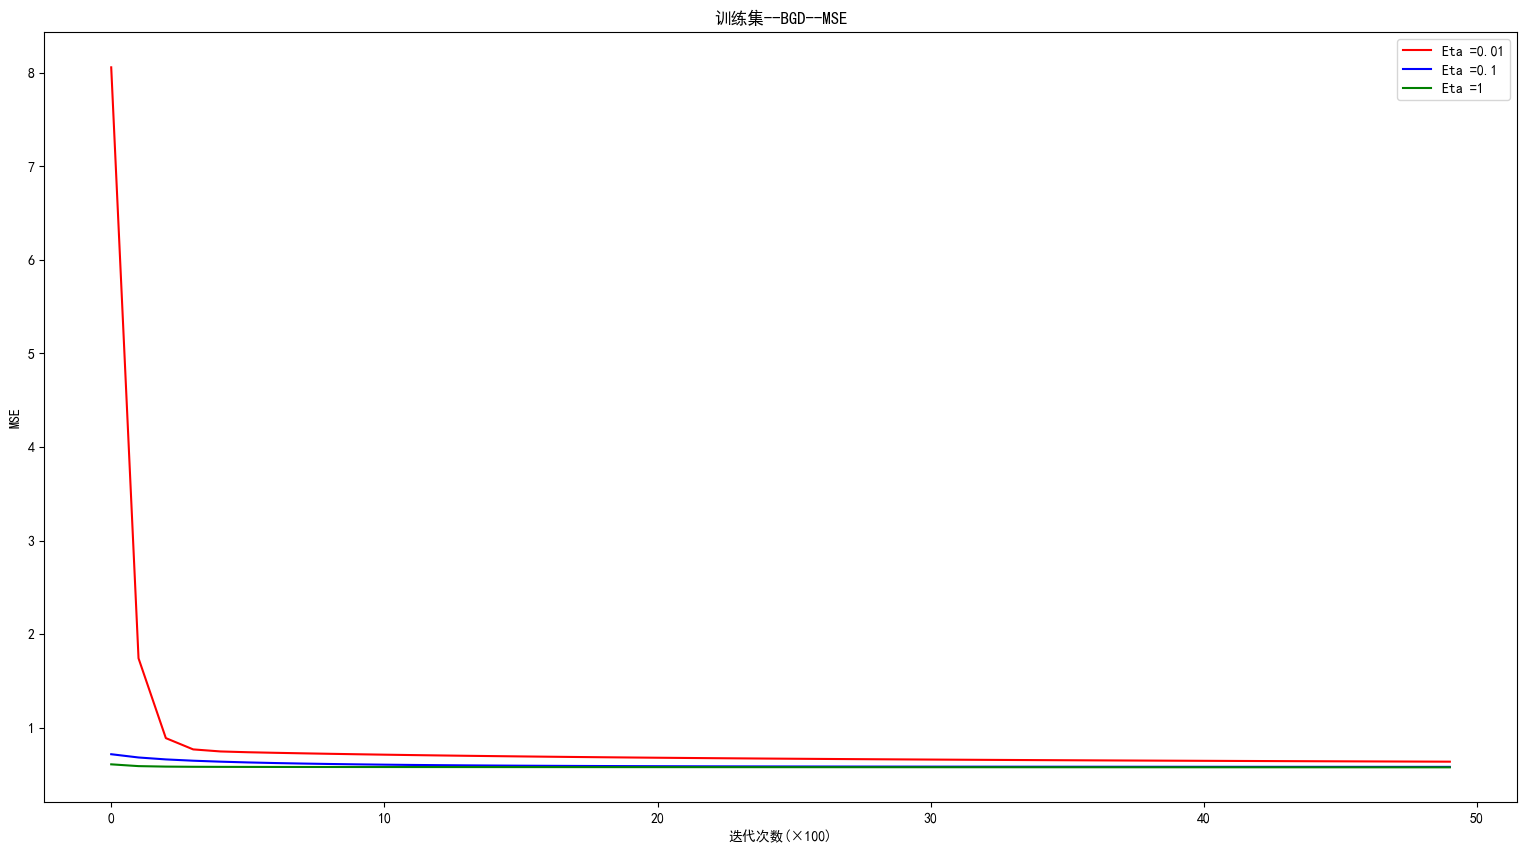

In [16]:
#批量梯度下降 训练集 不同迭代次数
plt.figure(figsize=(19,10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.plot(BGDLoss1, color = "red",label = 'Eta =0.01')
plt.plot(BGDLoss2, color = "blue",label = 'Eta =0.1')
plt.plot(BGDLoss3, color = "green",label = 'Eta =1')

plt.legend()
plt.xlabel("迭代次数(×100)")
plt.ylabel("MSE")
plt.title("训练集--BGD--MSE")
plt.show()

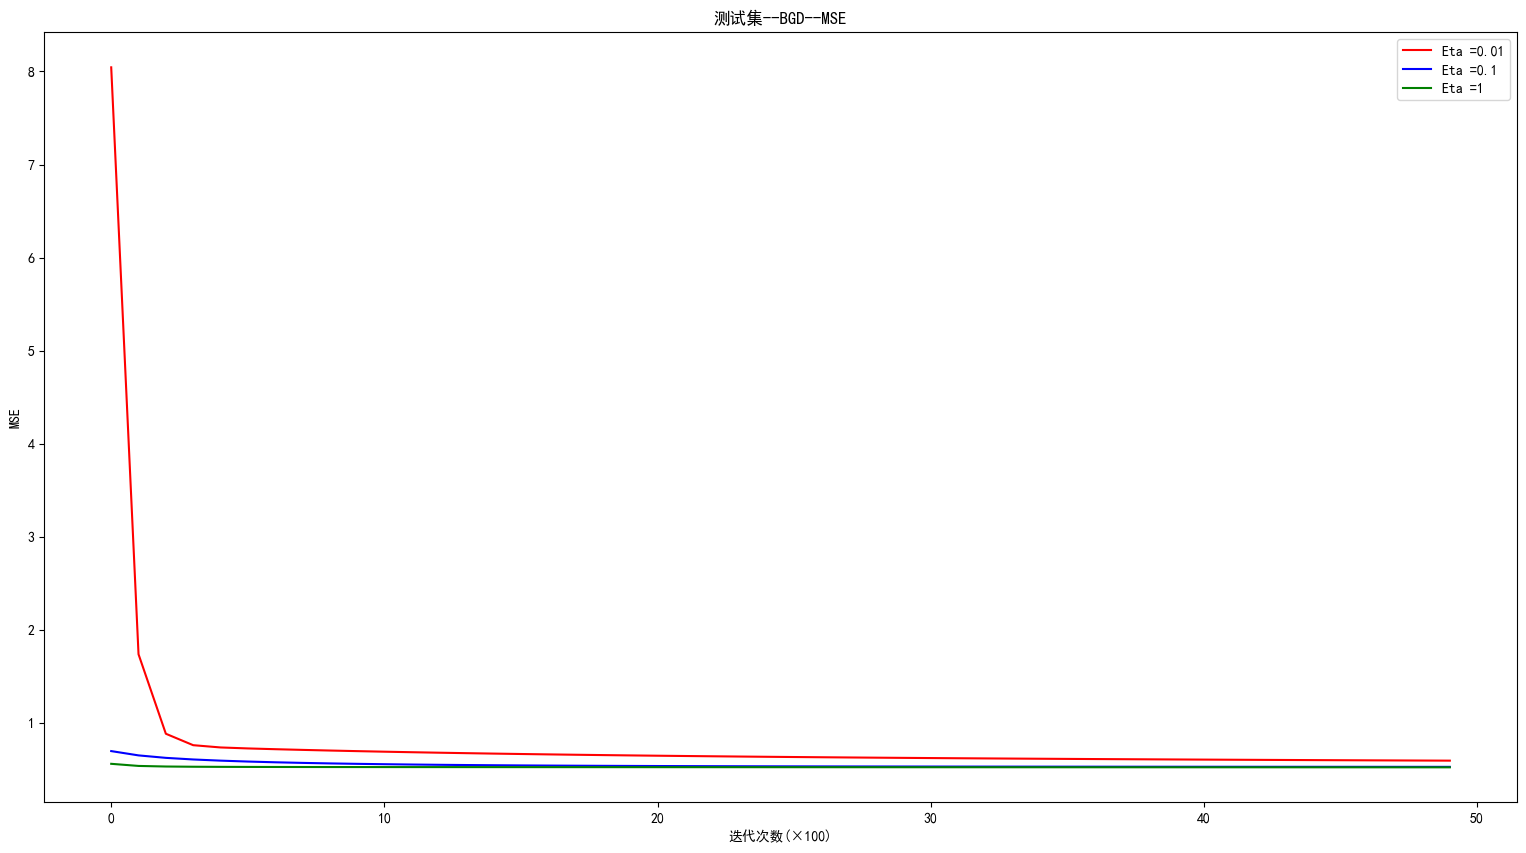

In [17]:
#批量梯度下降 测试集 不同迭代次数
plt.figure(figsize=(19,10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.plot(BGDLoss4, color = "red",label = 'Eta =0.01')
plt.plot(BGDLoss5, color = "blue",label = 'Eta =0.1')
plt.plot(BGDLoss6, color = "green",label = 'Eta =1')

plt.legend()
plt.xlabel("迭代次数(×100)")
plt.ylabel("MSE")
plt.title("测试集--BGD--MSE")
plt.show()

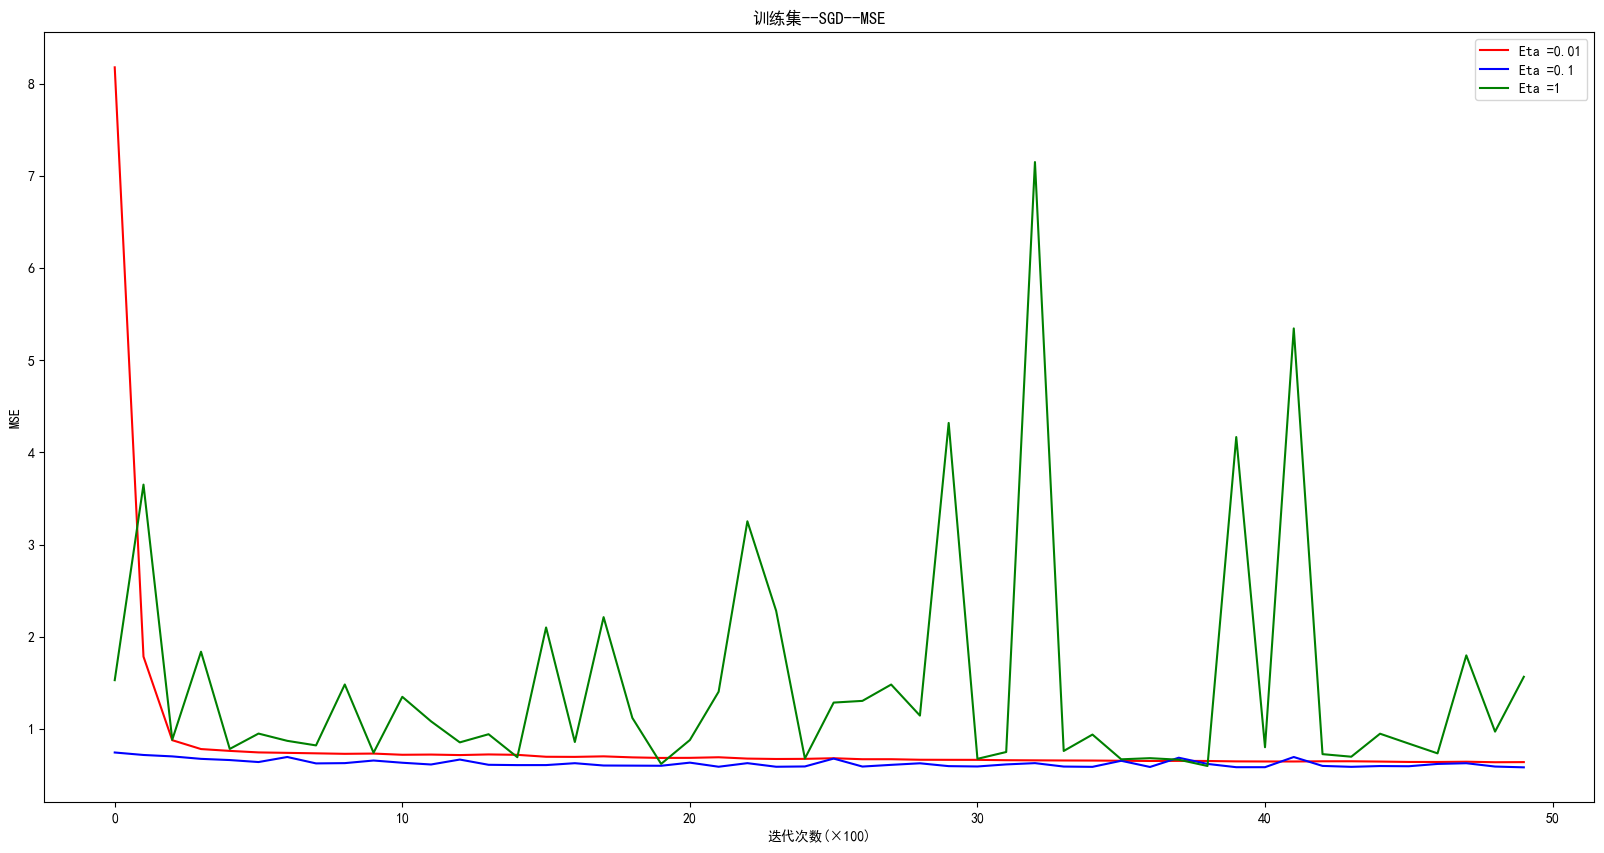

In [18]:
#随机梯度下降 训练集 不同迭代次数
plt.figure(figsize=(20,10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.plot(SGDLoss1, color = "red",label = 'Eta =0.01')
plt.plot(SGDLoss2, color = "blue",label = 'Eta =0.1')
plt.plot(SGDLoss3, color = "green",label = 'Eta =1')

plt.legend()
plt.xlabel("迭代次数(×100)")
plt.ylabel("MSE")
plt.title("训练集--SGD--MSE")
plt.show()

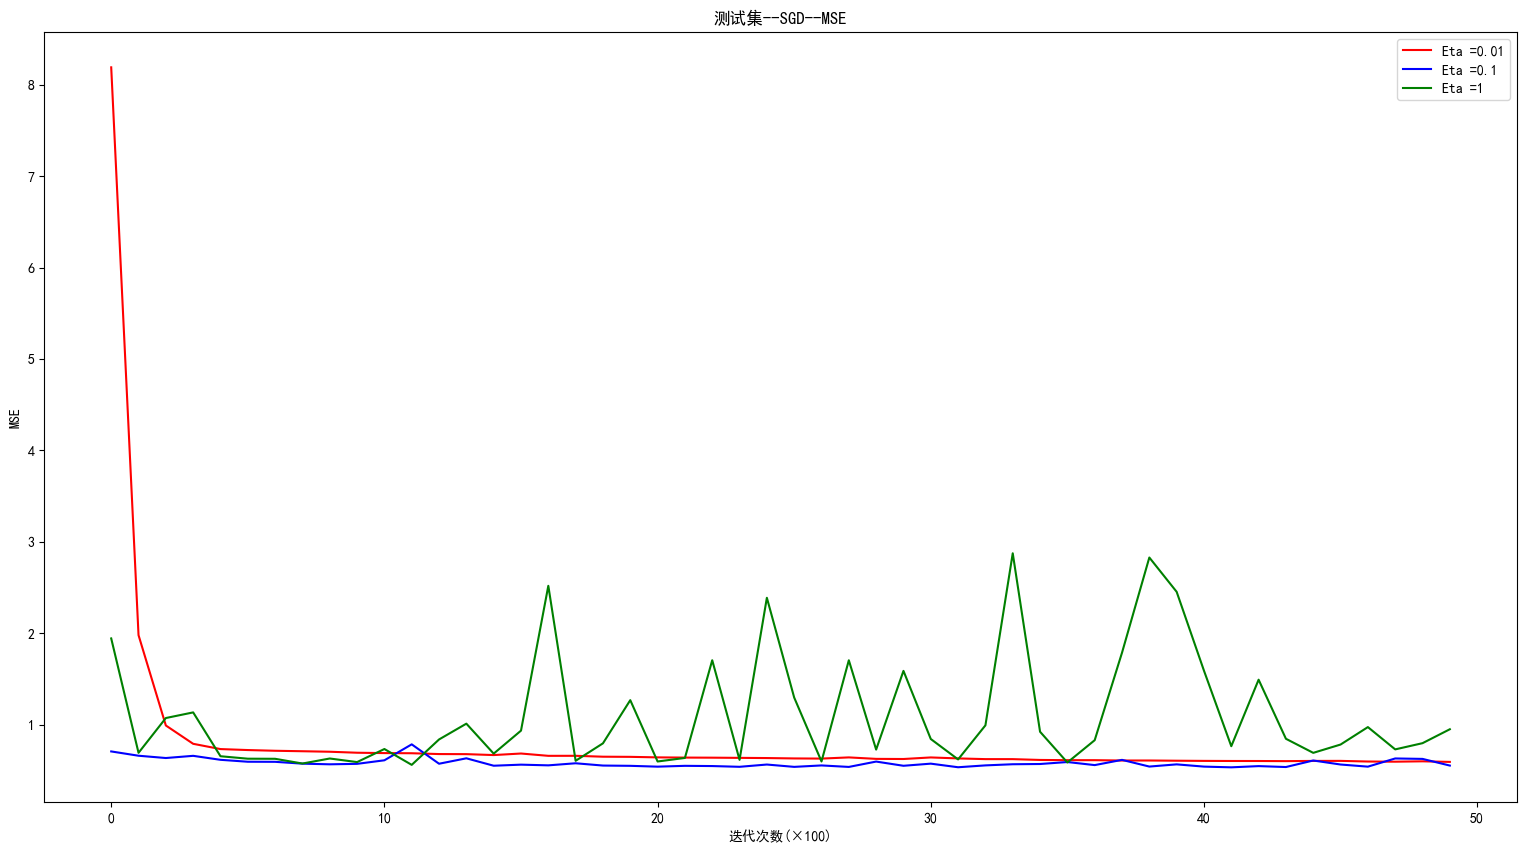

In [19]:
#随机梯度下降 测试集 不同迭代次数
plt.figure(figsize=(19,10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.plot(SGDLoss4, color = "red",label = 'Eta =0.01')
plt.plot(SGDLoss5, color = "blue",label = 'Eta =0.1')
plt.plot(SGDLoss6, color = "green",label = 'Eta =1')

plt.legend()
plt.xlabel("迭代次数(×100)")
plt.ylabel("MSE")
plt.title("测试集--SGD--MSE")
plt.show()

### 平均测试误差

In [20]:
print("以学习率0.1,迭代5000次为例\n")
n = len(y_test)
BGD_avg = np.sum(np.power((y_test-np.dot(X_test,BGDTheta2)),2)) / n
print("批量梯度下降平均测试误差：",BGD_avg)
SGD_avg = np.sum(np.power((y_test-np.dot(X_test,SGDTheta2)),2)) / n
print("随机梯度下降平均测试误差：",SGD_avg)

以学习率0.1,迭代5000次为例

批量梯度下降平均测试误差： 0.5358594475551908
随机梯度下降平均测试误差： 0.548377815944497


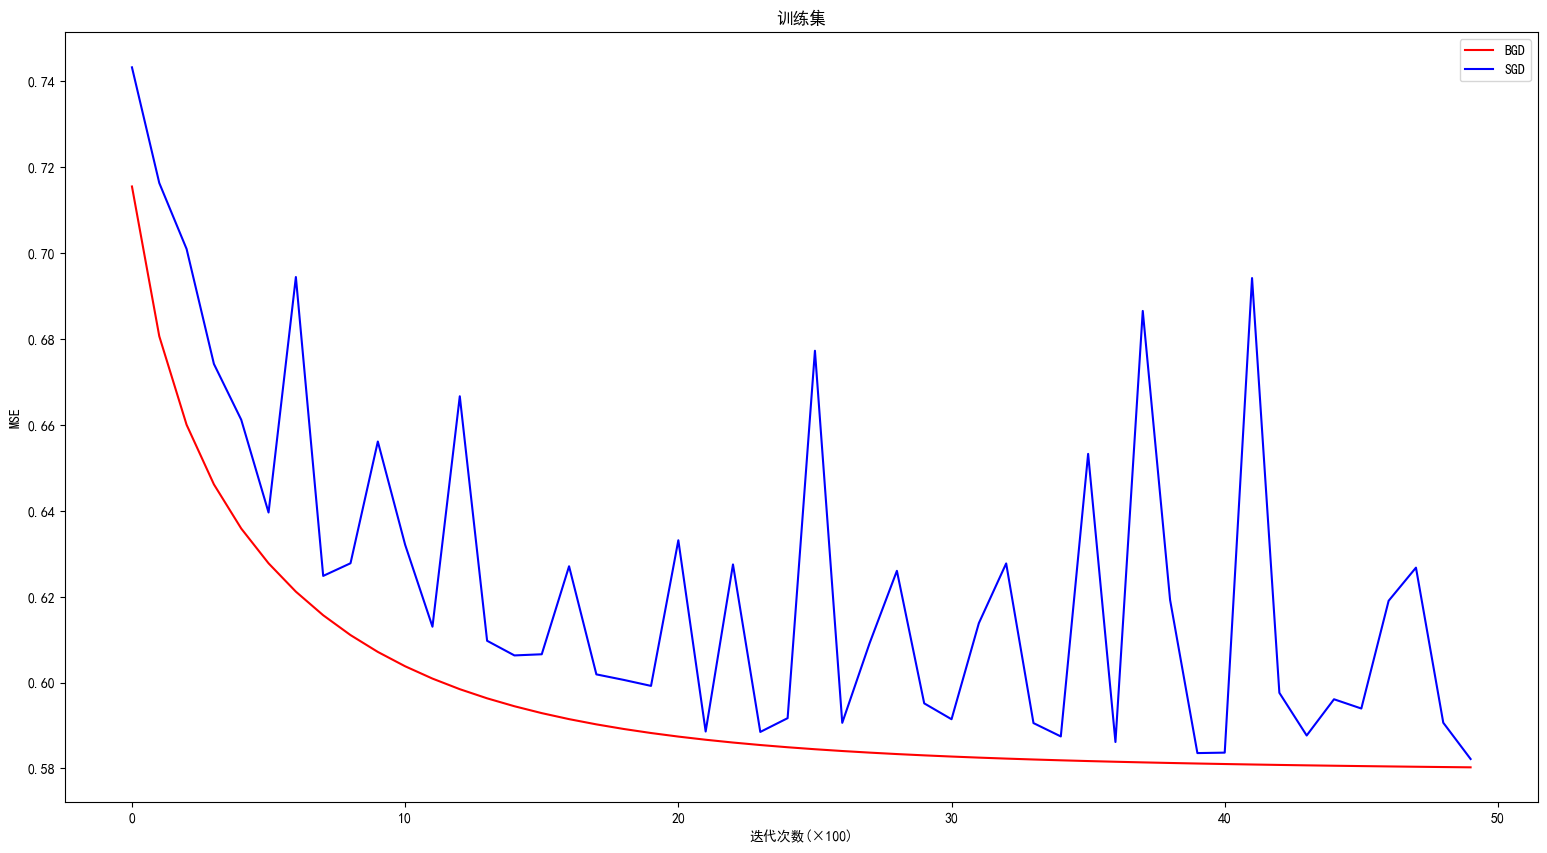

In [21]:
#学习率0.1  迭代次数5000
plt.figure(figsize=(19,10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.plot(BGDLoss2, color = "red",label = 'BGD')
plt.plot(SGDLoss2, color = "blue",label = 'SGD')


plt.legend()
plt.xlabel("迭代次数(×100)")
plt.ylabel("MSE")
plt.title("训练集")
plt.show()

### 最佳学习率

In [22]:
#定义学习率列表，对不同学习率分别测试
ETA=[0.001,0.005,0.01,0.05,0.1,0.5,1]
#即以迭代10000为例,测试学习率0.001,0.005,0.01,0.05,0.1,0.5,1时的结果

#损失
bgdloss = []
sgdloss = []
#平均误差
bgderror = []
sgderror = []
#迭代测试并记录
for e in ETA:
    Loss_bgd,t_bgd = MyBGD(X_train,X_train,e,W_init,5000)
    Loss_sgd,t_sgd = MySGD(X_train,X_train,e,W_init,5000)
    bgdloss.append(Loss_bgd)
    sgdloss.append(Loss_sgd)
    n=len(y_test)
    bgderror.append(np.sum(np.power((y_test-np.dot(X_test,t_bgd)),2)) / n)
    sgderror.append(np.sum(np.power((y_test-np.dot(X_test,t_sgd)),2)) / n)


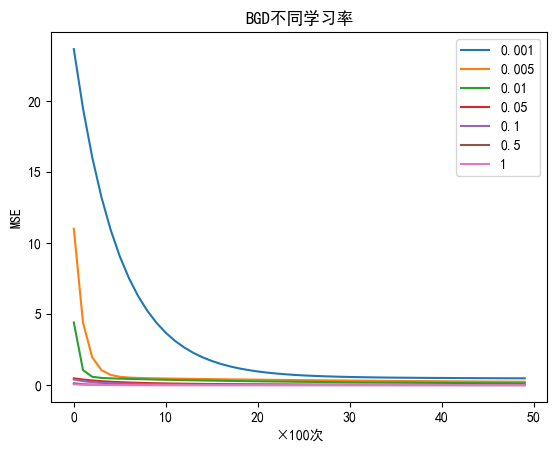

In [23]:
#批量梯度下降 迭代次数5000 不同学习率
sETA=['0.001','0.005','0.01','0.05','0.1','0.5','1']
for i in range(len(bgdloss)):
    plt.plot(bgdloss[i], label = sETA[i])

plt.legend()
plt.xlabel("×100次")
plt.ylabel("MSE")
plt.title("BGD不同学习率")
plt.show()

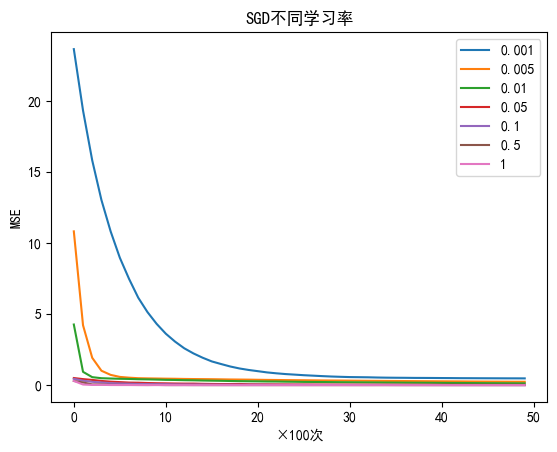

In [24]:
#随机梯度下降 迭代次数5000 不同学习率
for i in range(len(sgdloss)):
    plt.plot(sgdloss[i], label = sETA[i])

plt.legend()
plt.xlabel("×100次")
plt.ylabel("MSE")
plt.title("SGD不同学习率")
plt.show()
    

In [25]:
#对于测试集而言，拟合效果最好的学习率

print("用测试集测试，BGD结果最好的是学习率为",ETA[bgderror.index(min(bgderror))], "时")
print("用测试集测试，SGD结果最好的是学习率为",ETA[sgderror.index(min(sgderror))], "时")

用测试集测试，BGD结果最好的是学习率为 0.005 时
用测试集测试，SGD结果最好的是学习率为 0.005 时


# 中级要求

### 回归模型在机器学习和统计学上的差异

- **目的不同：**

  机器学习模型旨在使最准确的预测成为可能。
  
  统计模型是为推断变量之间的关系而设计的。

- **预测能力不同：**
    
  机器学习套用模型，有强大的计算能力。

  统计模型可以做出预测，但预测效果不一定理想。

- **适用场景不同：**

  机器学习更适合高精度预测。
  
  统计学更适合用于关系证明、数据推断。
  
- **相互间存在不同级的关系：**

  机器学习是基于统计学的。
  


通过梯度下降算法的编写，不难发现机器学习中蕴含的大量统计学基础知识。但二者还是有本质性差距的：统计学为我们揭示了一些拟合、预测方面的规律，为机器学习的工作打下了基础。

但是我们在进行机器学习时，模型是一个底层基础，我们需要在此基础上完成训练、预测等一系列工作。我们在完成机器学习的时候需要**用到训练集与测试集**，搭建好的模型并不是可以直接使用的，我们需要对模型进行训练才能使模型具备预测功能，而统计学的知识是可以直接应用的。

此外机器学习的**预测能力**是不可比拟的，它能通过学习得到合适的参数，为统计模型赋予了生命力，是一种强有力的工具；而统计学所揭示的规律就是一座坚实的地基，我们能从其上做延伸扩展，广泛应用到很多的领域。

# 高级要求

In [26]:
#岭回归函数
def myRidge(X, y, Lambda):  
    """
    岭回归
    args:
        X - 训练数据集
        y - 目标标签值
        Lambda - 惩罚项系数
   return:
        权重系数
   """
    return np.linalg.inv(X.T.dot(X) + Lambda * np.eye(X.shape[1])).dot(X.T).dot(y)

In [27]:
#不同惩罚系数下  计算平均训练误差和平均测试误差
train_loss = []
test_loss = []
lambda_list = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in lambda_list:
    ridge_theta = myRidge(X_train,y_train,i)
    train_loss.append( np.sum(np.power((y_train - np.dot(X_train,ridge_theta)),2))/(X_train.shape[0]))
    test_loss.append(np.sum(np.power((y_test - np.dot(X_test,ridge_theta)),2))/(X_test.shape[0]))

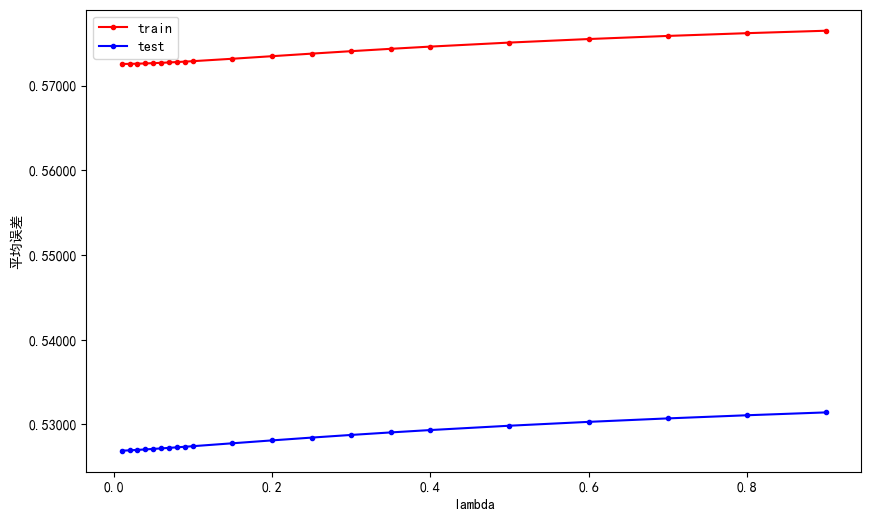

In [28]:
#平均训练误差  平均测试误差
plt.figure(figsize=(10,6))
plt.plot(lambda_list,train_loss,color='r',label="train", marker=".") 
plt.plot(lambda_list,test_loss,color='b',label="test", marker="." )
plt.xlabel("lambda")
plt.ylabel("平均误差")
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.5f'))
plt.legend()
plt.show()